In [20]:
!pip install finterstellar

## RSI

In [21]:
import finterstellar as fs

df = fs.get_price('TSLA', start_date='2022-01-01', end_date='2022-12-31')
df.head(10)

,TSLA
2022-01-03,399.93
2022-01-04,383.20
2022-01-05,362.71
2022-01-06,354.90
2022-01-07,342.32
2022-01-10,352.71
2022-01-11,354.80
2022-01-12,368.74
2022-01-13,343.85
2022-01-14,349.87


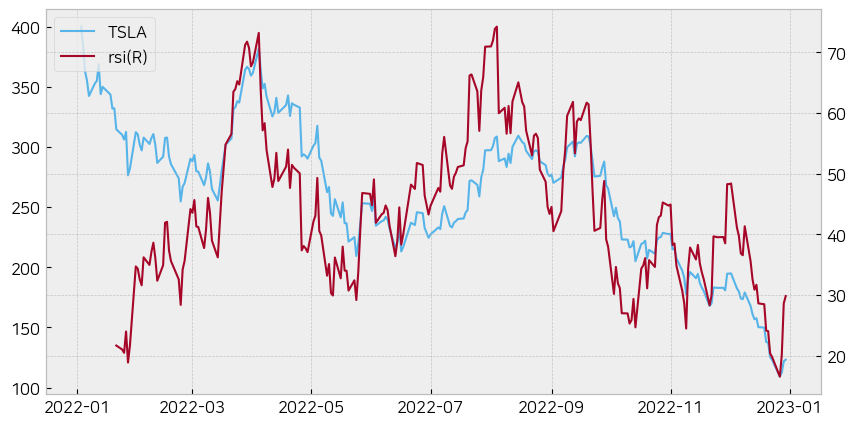

In [22]:
fs.rsi(df, w=14)
fs.draw_chart(df, left='TSLA', right='rsi')

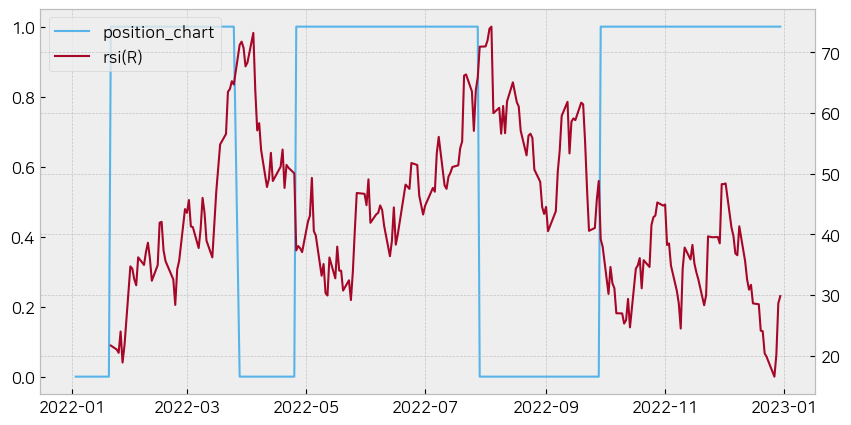

In [23]:
fs.indicator_to_signal(df, factor='rsi', buy=40, sell=70)
fs.position(df)
fs.draw_chart(df, left='position_chart', right='rsi')

# 표에서 3번의 매매를 확인할 수 있음
# 상승장에서 매수하고 하락장에서 매도하는 추세
# 마지막 매수 시점에서는 하락장이 계속되어 팔지 못하고 있는 것으로 보임. 
# 하락하고 상승하는 추세를 보이다가 쭉 하락했기 때문인듯

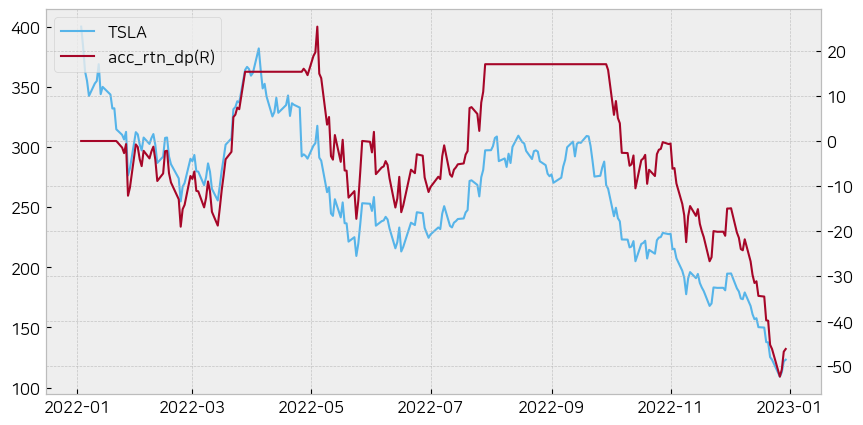

In [24]:
fs.evaluate(df, cost=.0025)
fs.draw_chart(df, left='TSLA', right='acc_rtn_dp')

In [25]:
fs.performance(df, rf_rate=.01)

CAGR: -49.20%
Accumulated return: -46.23%
Average return: 8.42%
Benchmark return : -60.85%
Number of trades: 3
Number of win: 2
Hit ratio: 66.67%
Investment period: 0.9yrs
Sharpe ratio: -0.69
MDD: -62.03%
Benchmark MDD: -72.72%


## 볼린저밴드

### 모멘텀 전략

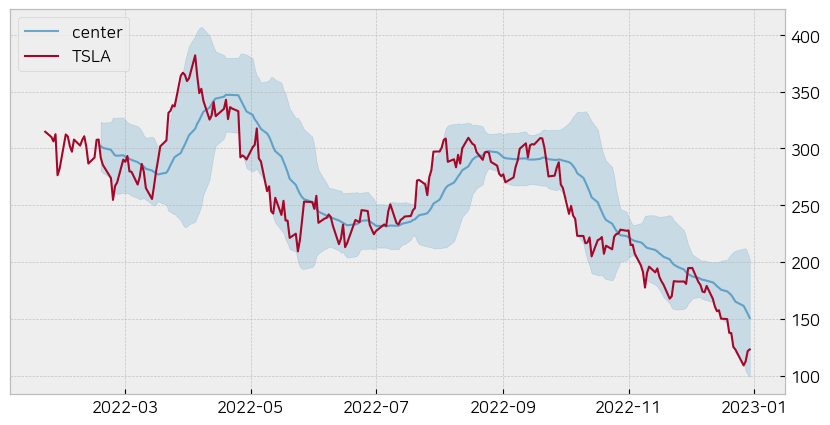

In [26]:
fs.bollinger(df, w=20, k=2)
fs.draw_band_chart(df)

- 오를 때는 밴드 상단을 타고 오르고, 내릴 때는 하단을 타고 내려옴

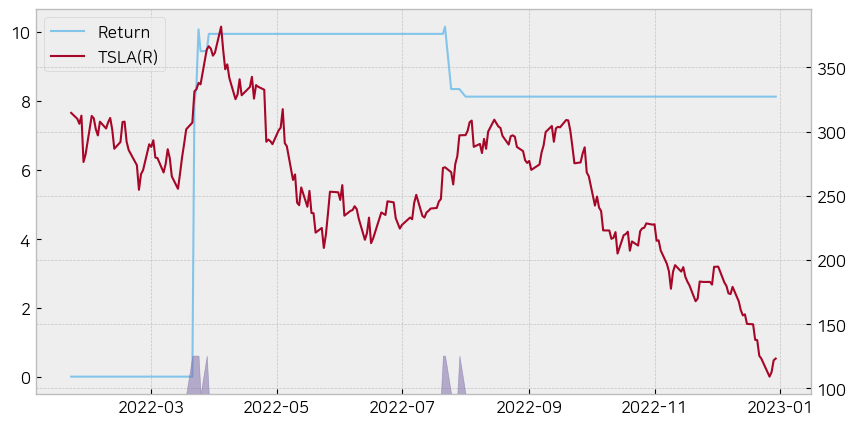

In [27]:
fs.band_to_signal(df, buy='A', sell='B')
fs.position(df)
fs.evaluate(df, cost=.0025)
fs.draw_trade_results(df)

In [28]:
fs.performance(df, rf_rate=.01)

CAGR: 9.38%
Accumulated return: 8.12%
Average return: 2.06%
Benchmark return : -57.83%
Number of trades: 4
Number of win: 2
Hit ratio: 50.00%
Investment period: 0.9yrs
Sharpe ratio: 0.78
MDD: -1.85%
Benchmark MDD: -71.43%


### 평균회귀 전략

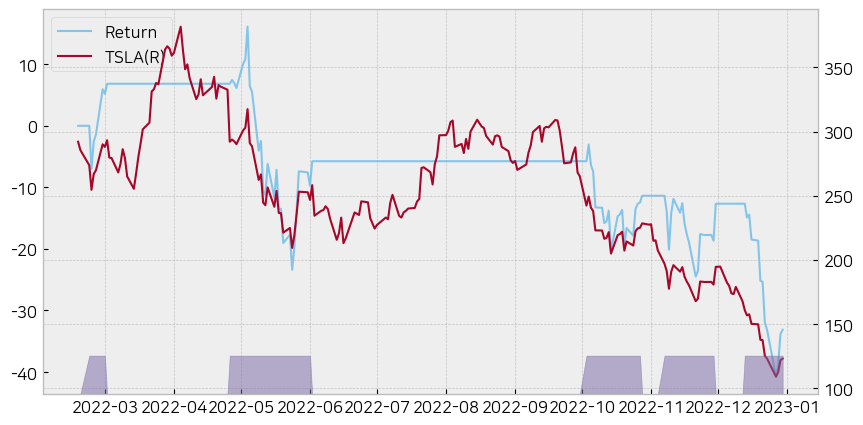

In [29]:
fs.band_to_signal(df, buy='D', sell='B')
fs.position(df)
fs.evaluate(df, cost=.0025)
fs.draw_trade_results(df)

In [30]:
fs.performance(df, rf_rate=.01)

CAGR: -38.30%
Accumulated return: -33.16%
Average return: -3.09%
Benchmark return : -57.83%
Number of trades: 5
Number of win: 1
Hit ratio: 20.00%
Investment period: 0.9yrs
Sharpe ratio: -0.73
MDD: -49.02%
Benchmark MDD: -71.43%


### 모멘텀 + 평균회귀 전략

CAGR: -41.01%
Accumulated return: -32.36%
Average return: -1.57%
Benchmark return : -57.60%
Number of trades: 8
Number of win: 2
Hit ratio: 25.00%
Investment period: 0.8yrs
Sharpe ratio: -0.76
MDD: -49.87%
Benchmark MDD: -71.43%


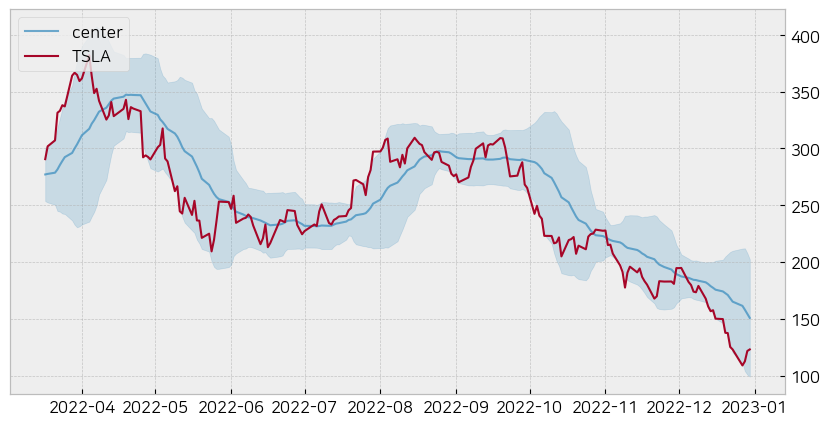

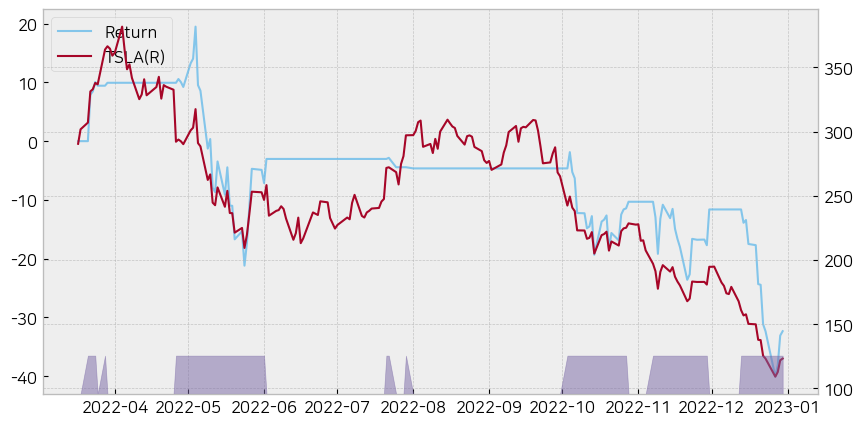

In [31]:
df = fs.bollinger(df, w=20, k=2)
df['s1'] = fs.band_to_signal(df, buy='A', sell='B')
df['s2'] = fs.band_to_signal(df, buy='D', sell='B')
fs.combine_signal_or(df, 's1', 's2')
fs.position(df)
fs.evaluate(df, cost=.0025)
fs.performance(df, rf_rate=.01)
fs.draw_band_chart(df)
fs.draw_trade_results(df)

## MACD

MACD는 이동평균수렴확산지수라고 말하며, 대표적인 보조 지표 중 하나입니다.

MACD를 계산할 때 MA(Moving Average)를 사용하여 주가 추이를 보면, 몇 일간의 누적 데이터가 필요하므로 실제 추이보다 늦어질 수 밖에 없습니다.

### MACD 사용

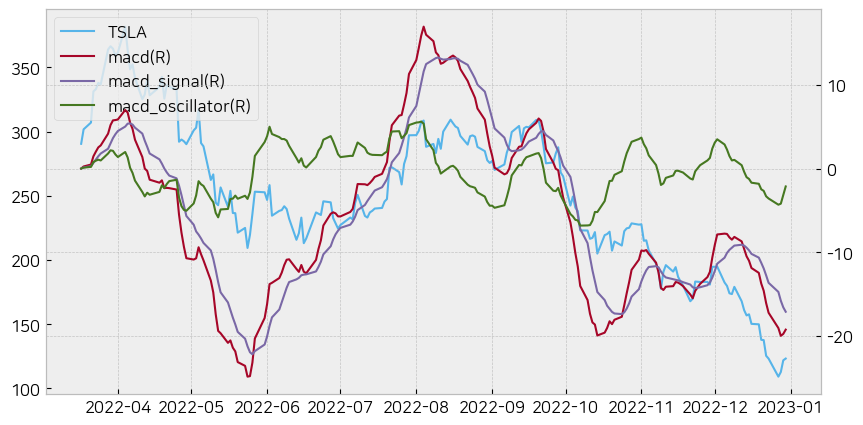

In [32]:
fs.macd(df)
fs.draw_chart(df, left='TSLA', right=['macd', 'macd_signal', 'macd_oscillator'])

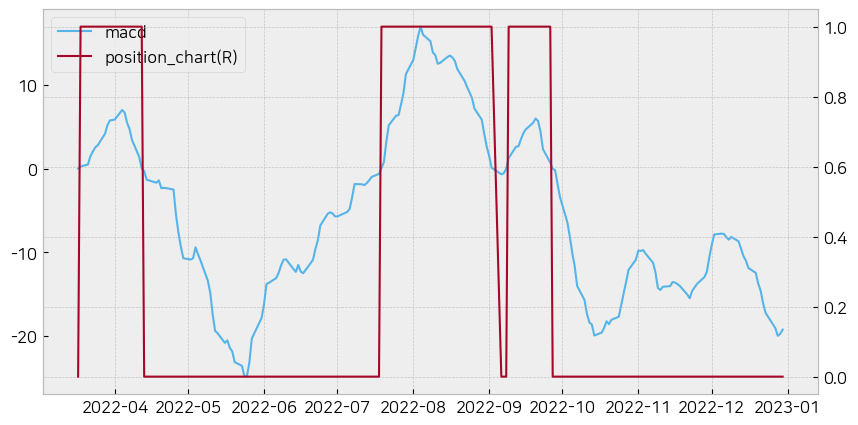

In [33]:
fs.indicator_to_signal(df, factor='macd', buy=0, sell=0)
fs.position(df)
fs.draw_chart(df, left='macd', right='position_chart')

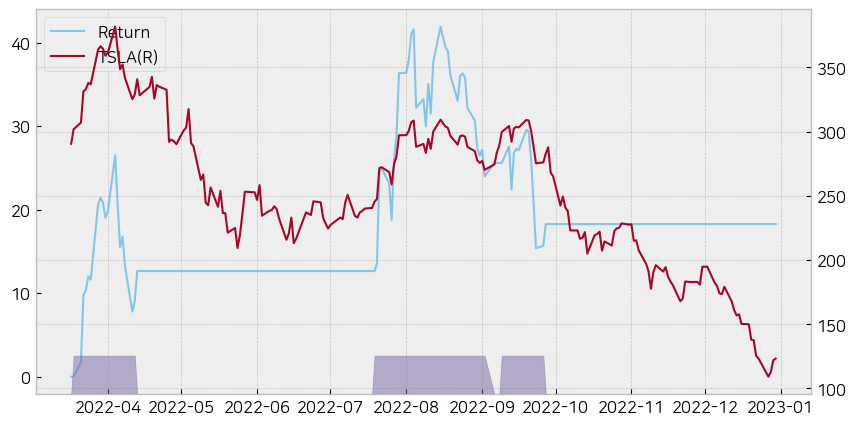

In [34]:
fs.evaluate(df, cost=.0025)
fs.draw_trade_results(df)

In [35]:
fs.performance(df, rf_rate=.01)

CAGR: 23.14%
Accumulated return: 18.26%
Average return: 6.10%
Benchmark return : -57.60%
Number of trades: 3
Number of win: 2
Hit ratio: 66.67%
Investment period: 0.8yrs
Sharpe ratio: 0.63
MDD: -18.70%
Benchmark MDD: -71.43%


### MACD Oscillator 사용

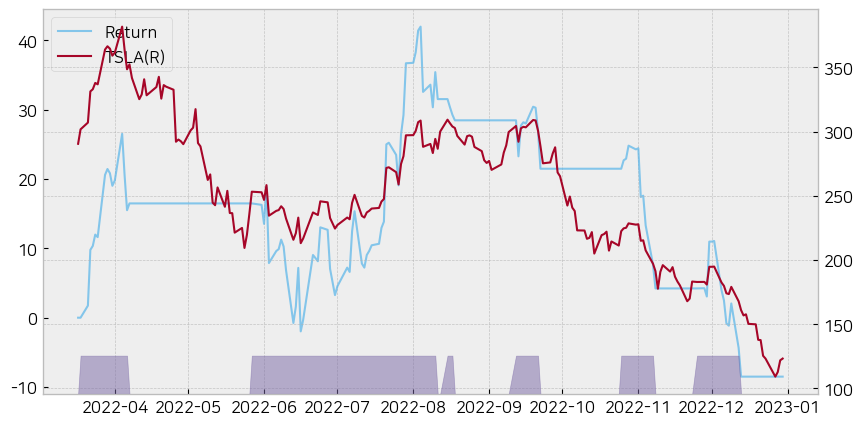

In [36]:
fs.indicator_to_signal(df, factor='macd_oscillator', buy=0, sell=0)
fs.position(df)
fs.evaluate(df, cost=.0025)
fs.draw_trade_results(df)

In [37]:
fs.performance(df, rf_rate=.01)

CAGR: -10.77%
Accumulated return: -8.50%
Average return: -0.80%
Benchmark return : -57.60%
Number of trades: 6
Number of win: 2
Hit ratio: 33.33%
Investment period: 0.8yrs
Sharpe ratio: -0.24
MDD: -35.55%
Benchmark MDD: -71.43%


## Envelope

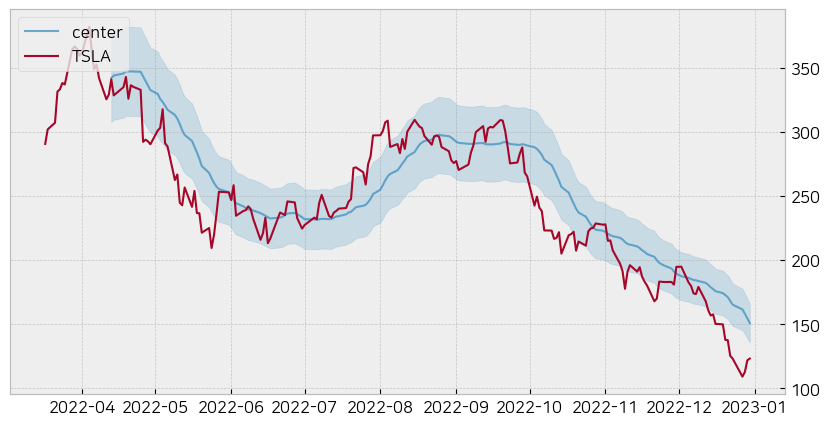

In [38]:
fs.envelope(df, w=20, spread=.1)
fs.draw_band_chart(df)

### 모멘텀 전략

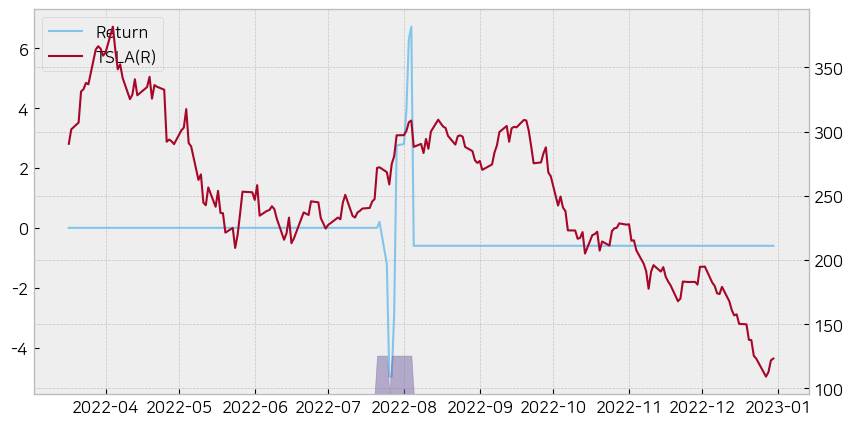

In [39]:
fs.band_to_signal(df, buy='A', sell='B')
fs.position(df)
fs.evaluate(df, cost=.0025)
fs.draw_trade_results(df)

In [40]:
fs.performance(df, rf_rate=.01)

CAGR: -0.84%
Accumulated return: -0.60%
Average return: -0.19%
Benchmark return : -63.85%
Number of trades: 2
Number of win: 1
Hit ratio: 50.00%
Investment period: 0.7yrs
Sharpe ratio: -0.12
MDD: -6.86%
Benchmark MDD: -71.43%


### 평균 회귀 전략

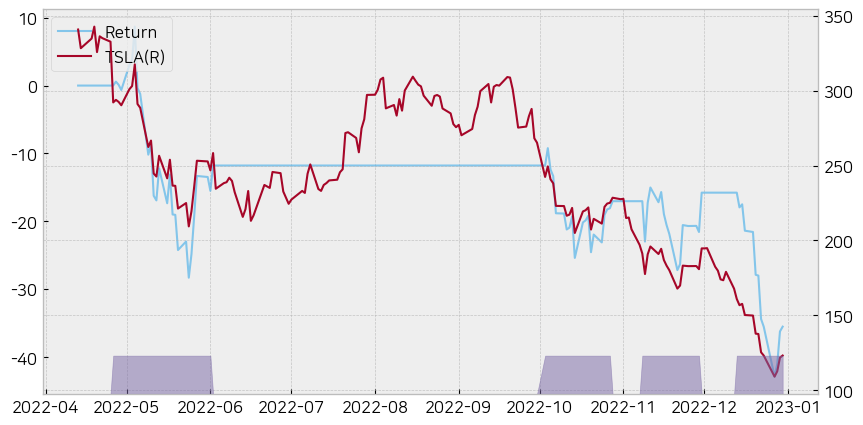

In [41]:
fs.band_to_signal(df, buy='D', sell='B')
fs.position(df)
fs.evaluate(df, cost=.0025)
fs.draw_trade_results(df)

In [42]:
fs.performance(df, rf_rate=.01)

CAGR: -49.72%
Accumulated return: -35.55%
Average return: -5.41%
Benchmark return : -63.85%
Number of trades: 4
Number of win: 1
Hit ratio: 25.00%
Investment period: 0.7yrs
Sharpe ratio: -0.89
MDD: -47.48%
Benchmark MDD: -68.17%


## stochastic 

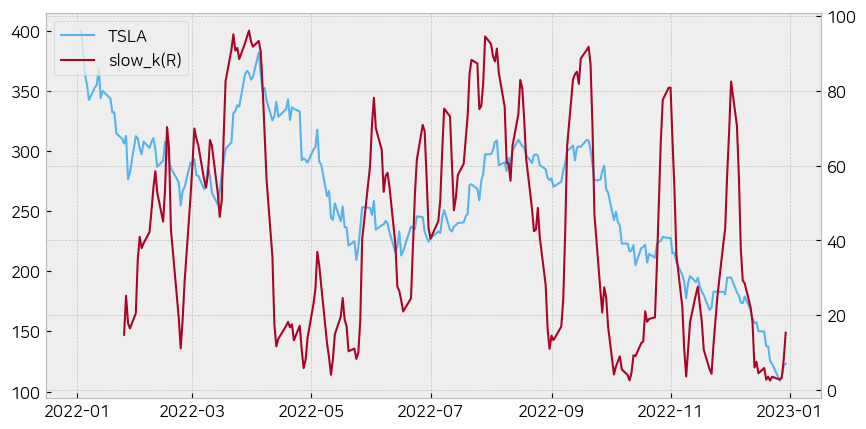

In [46]:
df = fs.get_ohlc('TSLA', start_date='2022-01-01', end_date='2022-12-31')
fs.stochastic(df, 'TSLA', n=14, m=3, t=3)
fs.draw_chart(df, left='TSLA', right='slow_k')

### 모멘텀 전략

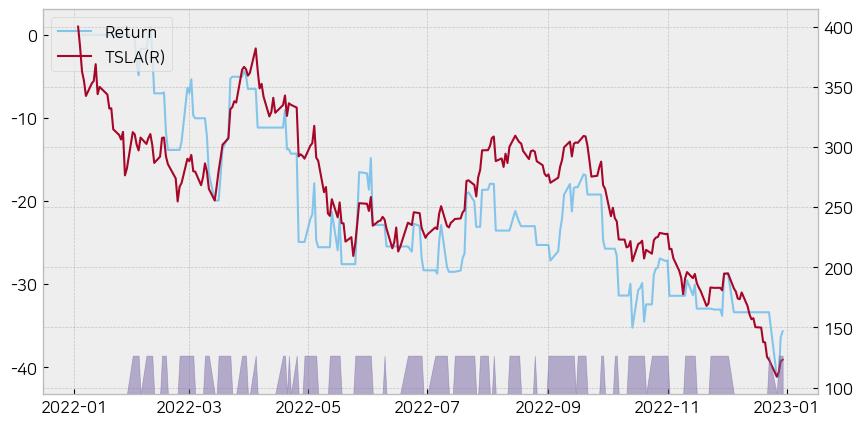

In [47]:
df['indicator'] = df['slow_k'] - df['slow_d']
fs.indicator_to_signal(df, factor='indicator', buy=0, sell=0)
fs.position(df)
fs.evaluate(df, cost=.0025)
fs.draw_trade_results(df)

In [48]:
fs.performance(df, rf_rate=.01)

CAGR: -38.63%
Accumulated return: -35.67%
Average return: -1.49%
Benchmark return : -55.43%
Number of trades: 32
Number of win: 8
Hit ratio: 25.00%
Investment period: 0.9yrs
Sharpe ratio: -0.69
MDD: -41.72%
Benchmark MDD: -72.72%


### 평균 회귀 전략

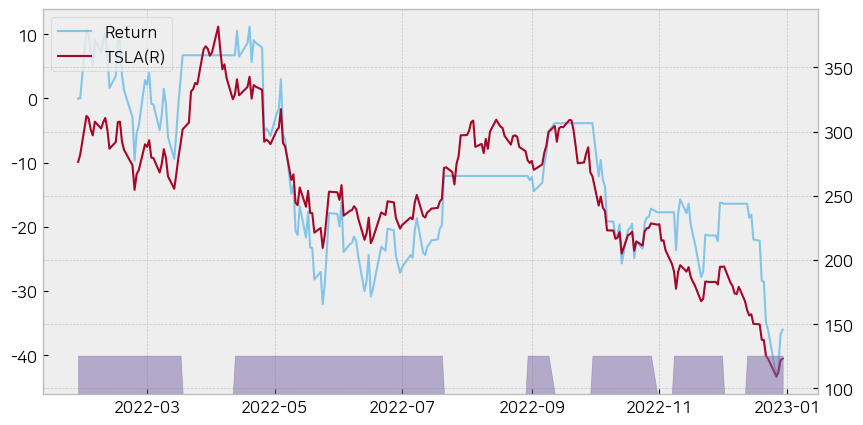

In [49]:
fs.indicator_to_signal(df, factor='slow_k', buy=20, sell=80)
fs.position(df)
fs.evaluate(df, cost=.0025)
fs.draw_trade_results(df)

In [50]:
fs.performance(df, rf_rate=.01)

CAGR: -39.02%
Accumulated return: -36.03%
Average return: -5.27%
Benchmark return : -55.43%
Number of trades: 5
Number of win: 2
Hit ratio: 40.00%
Investment period: 0.9yrs
Sharpe ratio: -0.57
MDD: -49.04%
Benchmark MDD: -71.43%
